# Plots
- [x] Plot capacity vs avg acc, group(0-4)_acc
- [x] Plot train acc, group 0, 1, 2, 3 at hidden layer size 0  over time
- [x] Plot val 0, 1, 2, 3 over time
- [x] Plot train loss  over time
- [x] Plot bias over time
- [x] Plot SNR vs train accuracy, group (0-4) acc. SNR vs val accuracy, val group (0-4) acc

/tmp/ipykernel_9689/3103395134.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


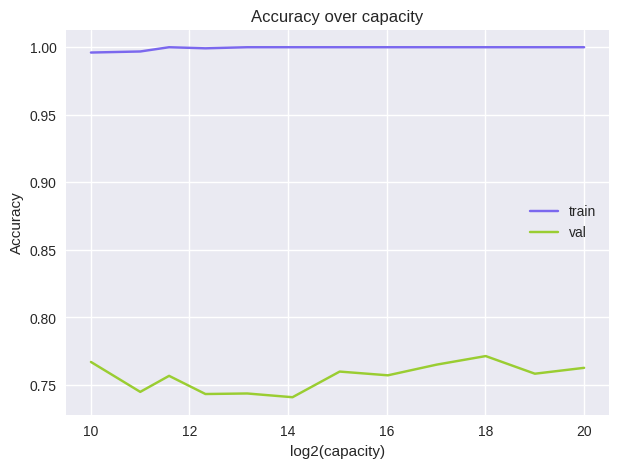

In [39]:
import json
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

with open("experiment_hidden_layer_results.json", "r") as f:
    hidden_layer_results = json.load(f)

capacities = []
train_accs = []
val_accs = []
for hidden_layer_size, value in hidden_layer_results.items():
    capacity = value['capacity']
    train_acc = value['train_acc'][-1]
    val_acc = value['val_acc'][-1]

    capacities.append(capacity)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
fig, ax = plt.subplots(figsize = (7,5))

plt.plot(np.log2(capacities), train_accs, color='mediumslateblue')
plt.plot(np.log2(capacities), val_accs, color='yellowgreen')
ax.set_ylabel('Accuracy')
ax.set_xlabel('log2(capacity)')
ax.set_title("Accuracy over capacity")

plt.legend(["train", "val"])
plt.savefig("accuracy_over_capacity.png")

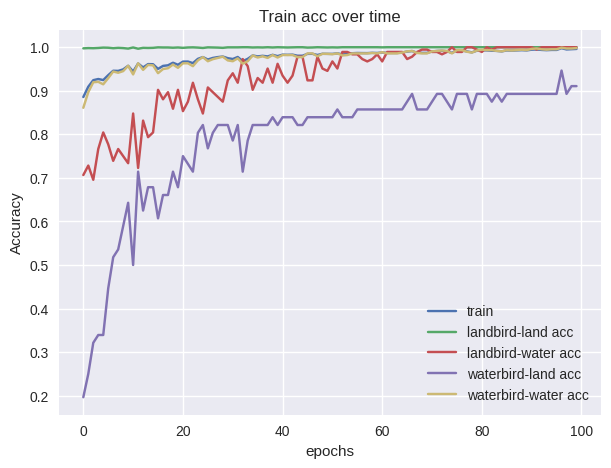

In [40]:
over_time_results = hidden_layer_results['0']
epochs = np.arange(over_time_results['num_epochs'])
train_acc = over_time_results['train_acc']
group0_acc = over_time_results['group0_acc']
group1_acc = over_time_results['group1_acc']
group2_acc = over_time_results['group2_acc']
group3_acc = over_time_results['group3_acc']
fig, ax = plt.subplots(figsize = (7,5))

plt.plot(epochs, train_acc)
plt.plot(epochs, group0_acc)
plt.plot(epochs, group1_acc)
plt.plot(epochs, group2_acc)
plt.plot(epochs, group3_acc)

group0 = "landbird-land"
group1 = "landbird-water"
group2 = "waterbird-land"
group3 = "waterbird-water"

ax.set_ylabel('Accuracy')
ax.set_xlabel('epochs')
ax.set_title("Train acc over time")
plt.legend(["train", f"{group0} acc", f"{group1} acc",f"{group2} acc",f"{group3} acc"])
plt.savefig("training_acc_over_time.png")

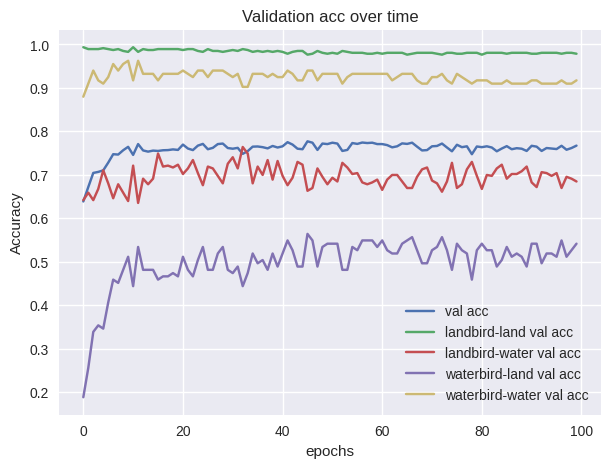

In [41]:
over_time_results = hidden_layer_results['0']
epochs = np.arange(over_time_results['num_epochs'])
train_acc = over_time_results['val_acc']
group0_acc = over_time_results['val_group0_acc']
group1_acc = over_time_results['val_group1_acc']
group2_acc = over_time_results['val_group2_acc']
group3_acc = over_time_results['val_group3_acc']
fig, ax = plt.subplots(figsize = (7,5))

plt.plot(epochs, train_acc)
plt.plot(epochs, group0_acc)
plt.plot(epochs, group1_acc)
plt.plot(epochs, group2_acc)
plt.plot(epochs, group3_acc)

ax.set_ylabel('Accuracy')
ax.set_xlabel('epochs')
ax.set_title("Validation acc over time")
plt.legend(["val acc", f"{group0} val acc", f"{group1} val acc",f"{group2} val acc",f"{group3} val acc"])
plt.savefig("val_acc_over_time.png")

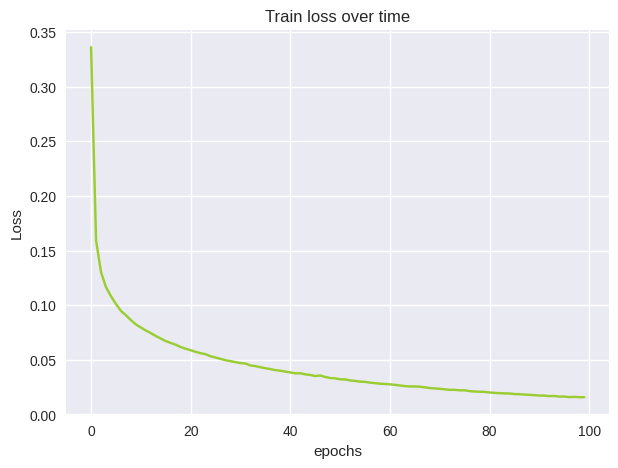

In [42]:
over_time_results = hidden_layer_results['0']
epochs = np.arange(over_time_results['num_epochs'])
train_loss = over_time_results['train_loss']
fig, ax = plt.subplots(figsize = (7,5))

plt.plot(epochs, train_loss, color='yellowgreen')

ax.set_ylabel('Loss')
ax.set_xlabel('epochs')
ax.set_title("Train loss over time")
plt.savefig("training_loss_over_time.png")

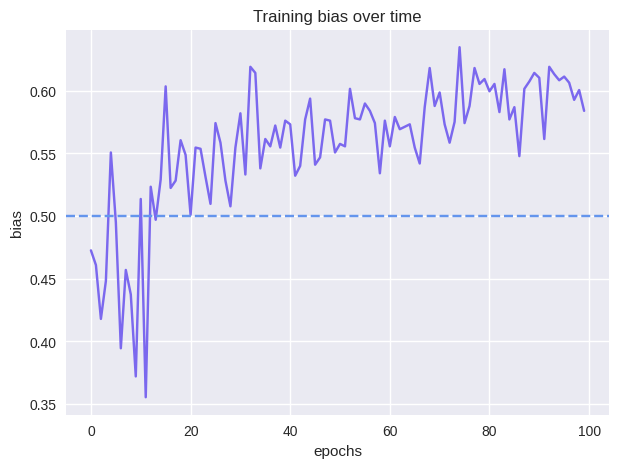

In [43]:
over_time_results = hidden_layer_results['0']
epochs = np.arange(over_time_results['num_epochs'])
bias = over_time_results['landbird_bias']
fig, ax = plt.subplots(figsize = (7,5))

plt.plot(epochs, bias, color='mediumslateblue')
plt.axhline(0.5, color='cornflowerblue', linestyle='--')
ax.set_xlabel('epochs')
ax.set_ylabel('bias')
ax.set_title("Training bias over time")
plt.savefig("training_bias_over_time.png")

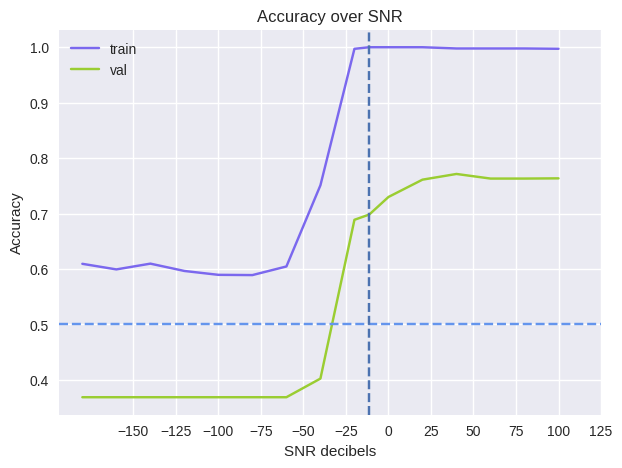

In [60]:

with open("experiment_snr_results.json", "r") as f:
    snr_results = json.load(f)

snrs = []
train_accs = []
val_accs = []
for snr_amt, value in snr_results.items():
    snr = value['snr_used']
    train_acc = value['train_acc'][-1]
    val_acc = value['val_acc'][-1]

    snrs.append(snr)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
fig, ax = plt.subplots(figsize = (7,5))

plt.plot(20*np.log10(snrs), train_accs, color='mediumslateblue')
plt.plot(20*np.log10(snrs), val_accs, color='yellowgreen')
plt.axhline(0.5, color='cornflowerblue', linestyle='--')
plt.axvline(-11.26,  linestyle='--')

ax.set_xlabel('SNR decibels')
ax.set_ylabel('Accuracy')
ax.set_title("Accuracy over SNR")
ax.set_xticks(range(-150,150, 25))

plt.legend(["train", "val"])
plt.savefig("training_acc_over_snr.png")


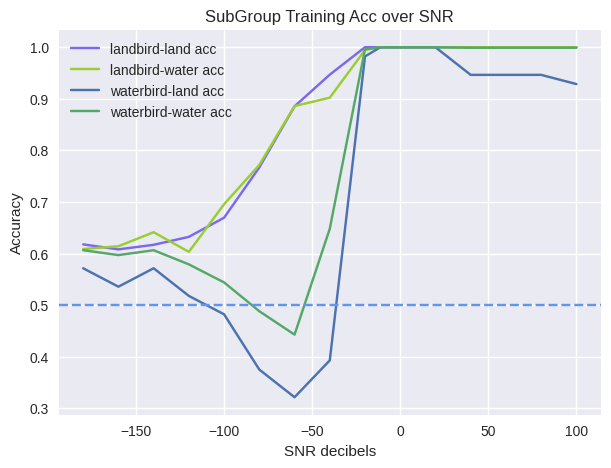

In [61]:
snrs = []
group0_accs = []
group1_accs = []
group2_accs = []
group3_accs = []

for snr_amt, value in snr_results.items():
    snr = value['snr_used']
    group0_acc = value['group0_acc'][-1]
    group1_acc = value['group1_acc'][-1]
    group2_acc = value['group2_acc'][-1]
    group3_acc = value['group3_acc'][-1]

    snrs.append(snr)
    group0_accs.append(group0_acc)
    group1_accs.append(group1_acc)
    group2_accs.append(group2_acc)
    group3_accs.append(group3_acc)

fig, ax = plt.subplots(figsize = (7,5))

plt.plot(20*np.log10(snrs), group0_accs, color='mediumslateblue')
plt.plot(20*np.log10(snrs), group1_accs, color='yellowgreen')
plt.plot(20*np.log10(snrs), group2_accs)
plt.plot(20*np.log10(snrs), group3_accs)

plt.axhline(0.5, color='cornflowerblue', linestyle='--')

ax.set_xlabel('SNR decibels')
ax.set_ylabel('Accuracy')
ax.set_title("SubGroup Training Acc over SNR")

plt.legend([ f"{group0} acc", f"{group1} acc",f"{group2} acc",f"{group3} acc"])
plt.savefig("subgroup_training_acc_over_snr.png")

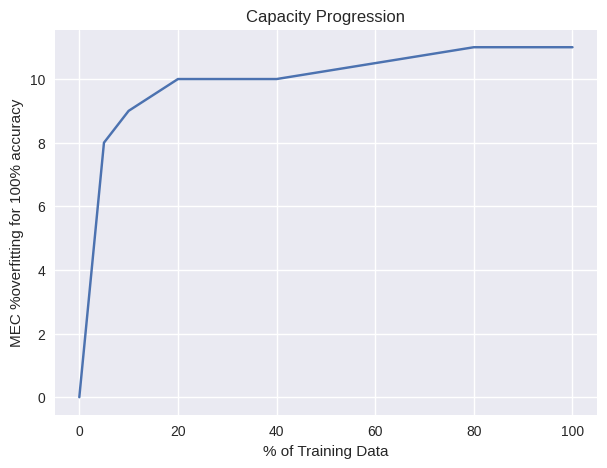

In [46]:
x = np.array([0, 5, 10, 20, 40, 80, 100])
y = np.array([0, 8, 9, 10, 10, 11, 11])
fig, ax = plt.subplots(figsize = (7,5))
plt.plot(x, y)
plt.xlabel("% of Training Data")
plt.ylabel("MEC %overfitting for 100% accuracy")
ax.set_title("Capacity Progression")
plt.savefig("capacity_progression.png")